In [90]:
import numpy as np 
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

In [91]:
superstore = pd.read_excel("Superstore.xls")
df = superstore.copy

In [92]:
df = pd.DataFrame(superstore)
df.head(2)

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,NaN,NaN,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   no             9993 non-null   float64       
 1   order _id      9993 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [94]:
df.isna().sum()

no               1
order _id        1
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [95]:
df_cleaned = df.dropna()

In [96]:
df_cleaned

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990.0,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [97]:
df = df_cleaned.copy()

In [98]:
df.isna().sum()

no               0
order _id        0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [99]:
df

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990.0,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [100]:
import pandas as pd
import plotly.express as px

# Load the data
superstore = pd.read_excel("Superstore.xls")
df = superstore.copy()

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample by month and sum the 'Profit' column
monthly_profit = df['Profit'].resample('M').sum().reset_index()
yearly_profit = df['Profit'].resample('Y').sum().reset_index()
quaterly_profit = df['Profit'].resample('Q').sum().reset_index()
# Create a line plot
fig = px.line(monthly_profit, x='Order Date', y='Profit', title='Monthly Profit')

# Show the plot
fig.show()

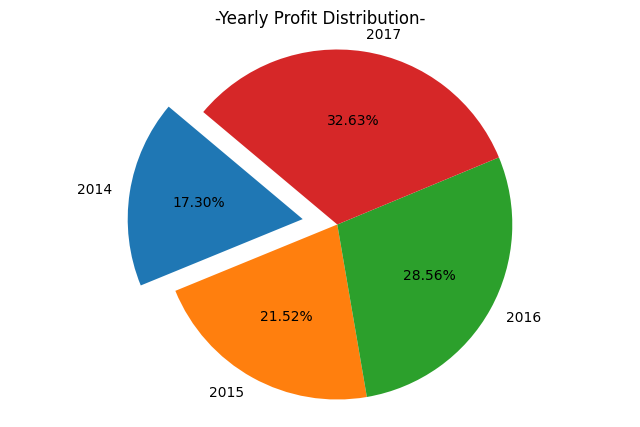

In [101]:
# Yearly Profit
plt.figure(figsize=(8,5))
plt.pie(yearly_profit['Profit'],labels= yearly_profit['Order Date'].dt.strftime("%Y"),
        autopct='%1.2f%%',
        explode = [0.2] + [0] * (len(yearly_profit)-1),
        startangle = 140
        )
plt.title('-Yearly Profit Distribution-')
plt.axis('equal')
plt.show()





In [102]:
quaterly_profit = df['Profit'].resample('Q').sum().reset_index()

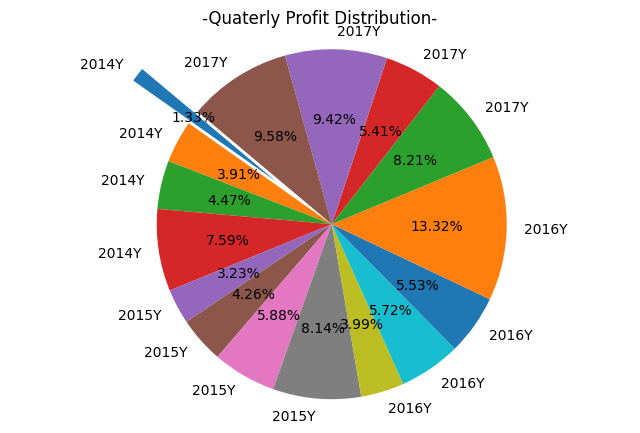

In [113]:
# Quaterly profit Profit
plt.figure(figsize=(8,5))
explode = ()
plt.pie(quaterly_profit['Profit'],labels= quaterly_profit   ['Order Date'].dt.strftime("%YY"),
        autopct='%1.2f%%',
        explode = [0.4] + [0] * (len(quaterly_profit)-1),
        startangle = 140
        )
plt.title('-Quaterly Profit Distribution-')
plt.axis('equal')
plt.show()




In [109]:
import pandas as pd
import logging
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(
    filename="superstore_analysis.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

def load_data(file_path):
    """"""
    try:
        logging.info("Loading data from file: %s", file_path)
        data = pd.read_excel(file_path)
        logging.info("Data loaded successfully. Shape: %s", data.shape)
        return data
    except Exception as e:
        logging.error("Error loading data: %s", e)
        raise

def clean_data(data):
    try:
        logging.info("Cleaning data...")
        initial_shape = data.shape
        data = data.drop_duplicates()
        data = data.dropna()
        logging.info("Data cleaned. Removed %d rows.", initial_shape[0] - data.shape[0])
        return data
    except Exception as e:
        logging.error("Error cleaning data: %s", e)
        raise

def analyze_yearly_profit(data):
    try:
        logging.info("Analyzing yearly ptofit...")
        data['Order Date'] = pd.to_datetime(data['Order Date'])
        data['year'] = data['Order Date'].dt.to_period('Y')
        yearly_profit = data.groupby('Year')['Profit'].sum().reset_index()
        logging.info('Yearly profit analysis completed')
        return yearly_profit
    except Exception as e:
        logging.error('Error analyzing yearly profit: %s',e)
        raise

def analyze_quarterly_profit(data):
    try:
        logging.info("Analyzing quarterly profit...")
        data['Order Date'] = pd.to_datetime(data['Order Date'])
        data['Quarter'] = data['Order Date'].dt.to_period('Q')
        quarterly_profit = data.groupby('Quarter')['Profit'].sum().reset_index()
        logging.info("Quarterly profit analysis completed.")
        return quarterly_profit
    except Exception as e:
        logging.error("Error analyzing quarterly profit: %s", e)
        raise

def analyze_monthly_profit(data):
    try:
        logging.info("Analyzing monthly profit...")
        data['Order Date'] = pd.to_datetime(data['Order Date'])
        data['Month'] = data['Order Date'].dt.to_period('M')
        monthly_profit = data.groupby('Month')['Profit'].sum().reset_index()
        logging.info('Monthly profit analysis completed.')
        return monthly_profit
    except Exception as e:
        logging.error("Error analyzin monthly profit: %s",e)
        raise


def visualize_monthly_profit(monthly_profit):
    """Visualize the monthly  profit as a line chart."""
    try:
        logging.info("Visualizing monthly profit...")
        plt.figure(figsize=(10, 6))
        plt.plot(monthly_profit['Month'].astype(str), monthly_profit['Profit'], marker='o', linestyle='-', color='skyblue')
        plt.title("Monthly Profit Analysis", fontsize=16)
        plt.xlabel("Month", fontsize=12)
        plt.ylabel("Profit", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        logging.info("Monthly profit visualization completed.")
    except Exception as e:
        logging.error("Error visualizing monthly profit: %s", e)
        raise


def visualize_quarterly_profit(quarterly_profit):
    """Visualize the quarterly profit as a bar chart."""
    try:
        logging.info("Visualizing quarterly profit...")
        plt.figure(figsize=(10, 6))
        plt.bar(quarterly_profit['Quarter'].astype(str), quarterly_profit['Profit'], color='skyblue')
        plt.title("Quarterly Profit Analysis", fontsize=16)
        plt.xlabel("Quarter", fontsize=12)
        plt.ylabel("Profit", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        logging.info("Quarterly profit visualization completed.")
    except Exception as e:
        logging.error("Error visualizing quarterly profit: %s", e)
        raise 

def visualize_yearly_profit(yearly_profit):
    """Visualize the yearly profit as a pie chart."""
    try:
        logging.info("Visualizing yearly profit...")
        # plt.figure(figsize=(8,5))
        # plt.pie(yearly_profit['Year'].astype(str),labels= yearly_profit[''],
        #         autopct='%1.2f%%',
        #         explode = [0.2] + [0] * (len(yearly_profit)-1),
        #         startangle = 140
        #         )
        plt.pie(yearly_profit['Profit'],labels= yearly_profit['Order Date'].dt.strftime("%Y"),
        autopct='%1.2f%%',
        explode = [0.2] + [0] * (len(yearly_profit)-1),
        startangle = 140
        )
        
        plt.title('-Yearly Profit Distribution-')
        plt.axis('equal')
        plt.show()
        logging.info("Yearly profit visualization completed.")
    except Exception as e:
        logging.error("Error visualizing yearly profit: %s", e)
        raise

# Main Pipeline
def superstore_analysis_pipeline(file_path):
    """Complete pipeline for analyzing superstore data."""
    try:
        data = load_data(file_path)

        #:Clean the data
        cleaned_data = clean_data(data)
        
        #  Analyze yearly profit
        yearly_profit = analyze_yearly_profit(cleaned_data)

        #  Analyze quarterly profit
        monthly_profit = analyze_monthly_profit(cleaned_data)  

        #  Analyze quarterly profit
        quarterly_profit = analyze_quarterly_profit(cleaned_data)

        #  Visualize results
        visualize_yearly_profit(yearly_profit)   
        visualize_monthly_profit(monthly_profit)
        visualize_quarterly_profit(quarterly_profit)

        logging.info("Superstore data analysis pipeline completed successfully.")
    except Exception as e:
        logging.error("Pipeline failed: %s", e)
file_path = 'Superstore.xls'
superstore_analysis_pipeline(file_path)